In [0]:
#!pip install PyDrive
import os
import json
import datetime
import pytz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials

## Q1

In [0]:
path = "./"

files = ["C:/Users/bourn/Desktop/UCLAstudying/2020winter/ECE219/Project5/tweets_#gohawks.txt", 
         "C:/Users/bourn/Desktop/UCLAstudying/2020winter/ECE219/Project5/tweets_#gopatriots.txt", 
         "C:/Users/bourn/Desktop/UCLAstudying/2020winter/ECE219/Project5/tweets_#nfl.txt", 
         "C:/Users/bourn/Desktop/UCLAstudying/2020winter/ECE219/Project5/tweets_#patriots.txt", 
         "C:/Users/bourn/Desktop/UCLAstudying/2020winter/ECE219/Project5/tweets_#sb49.txt", 
         "C:/Users/bourn/Desktop/UCLAstudying/2020winter/ECE219/Project5/tweets_#superbowl.txt"]

topics = ["gohawks", 
          "gopatriots", 
          "nfl", 
          "patriots", 
          "sb49", 
          "superbowl"]

for i, fl in enumerate(files):
    print("files[" + str(i) + "] => " + fl)

files[0] => C:/Users/bourn/Desktop/UCLAstudying/2020winter/ECE219/Project5/tweets_#gohawks.txt
files[1] => C:/Users/bourn/Desktop/UCLAstudying/2020winter/ECE219/Project5/tweets_#gopatriots.txt
files[2] => C:/Users/bourn/Desktop/UCLAstudying/2020winter/ECE219/Project5/tweets_#nfl.txt
files[3] => C:/Users/bourn/Desktop/UCLAstudying/2020winter/ECE219/Project5/tweets_#patriots.txt
files[4] => C:/Users/bourn/Desktop/UCLAstudying/2020winter/ECE219/Project5/tweets_#sb49.txt
files[5] => C:/Users/bourn/Desktop/UCLAstudying/2020winter/ECE219/Project5/tweets_#superbowl.txt


In [0]:
def load_file(file):
    """
    Load the time(in human readable form), follows, and retweets
    """
    result = []
    pst_tz = pytz.timezone('America/Los_Angeles')
    for line in open(path + file, 'r') :
        a = json.loads(line)
        cita = a['citation_date']
        citetime = datetime.datetime.fromtimestamp(cita,pst_tz)
        foll = a['author']['followers']
        retweet = a['metrics']['citations']['total']
        result.append({'time': citetime, 'followers': foll, 'retweets': retweet})
    return result

63


In [0]:
def get_statistic(data_list):
    """
    Count average number of tweets per hour, the number of followers per tweet, 
    number of retweets per tweet, and hour-tweets history.
    The starting time is set to be Jan.14th 0:00
    """
    retweet = 0
    followers = 0
    tweets = len(data_list)
    hourlist = []
    for p in data_list:
        retweet += int(p['retweets'])
        followers += int(p['followers'])
        hourlist.append(((p["time"].month-1)*31+p["time"].day-14)*24+p["time"].hour)
    return [float(tweets) / max(hourlist), float(followers) / tweets , float(retweet) / tweets], hourlist

In [0]:
def plot_hist(time_list, title = ""):
    n, bins, patches = plt.hist(time_list, 50, alpha=0.5)
    plt.hist(time_list, bins, alpha=0.5, color="blue")
    plt.xlabel("hour(h)")
    plt.ylabel("number of tweets in hour")
    plt.title(title)
    plt.show()

In [0]:
for i,file_i in enumerate(files):
    topic = load_file(file_i)
    stat, hourlist = get_statistic(topic)
    print("Average number of tweets per hour, Average number of followers of users posting the tweets per tweet, and Average number of retweets per tweet for hashtag "+topics[i]+": ", stat)

Average number of tweets per hour, Average number of followers of users posting the tweets per tweet, and Average number of retweets per tweet for hashtag gohawks:  [292.598615916955, 2217.9237355281984, 2.0132093991319877]
Average number of tweets per hour, Average number of followers of users posting the tweets per tweet, and Average number of retweets per tweet for hashtag gopatriots:  [40.888695652173915, 1427.2526051635405, 1.4081919101697078]
Average number of tweets per hour, Average number of followers of users posting the tweets per tweet, and Average number of retweets per tweet for hashtag nfl:  [397.64846416382255, 4662.37544523693, 1.5344602655543254]
Average number of tweets per hour, Average number of followers of users posting the tweets per tweet, and Average number of retweets per tweet for hashtag patriots:  [751.9129692832764, 3280.4635616550277, 1.7852871288476946]
Average number of tweets per hour, Average number of followers of users posting the tweets per tweet,

# Piece-wise Regression
## Q6

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statistics import mean
import math
import time

In [0]:
def plothist(file):
    with open(file, mode='r') as currentfile:
        lines = currentfile.readlines()
        json_object = json.loads(lines[-1])
        endtime = json_object['citation_date']
        
        json_object = json.loads(lines[0])
        starttime = json_object['citation_date']

        timespan = int(math.floor((endtime - starttime)/3600))

        timearray = [i for i in range(timespan +1)]
        tweets_perhour = np.zeros(timespan+1)

        for line in lines:
            json_object = json.loads(line)
            current_hour = int(math.floor((json_object['citation_date']-starttime)/3600))
            tweets_perhour[current_hour] += 1
        plt.figure(figsize = (10,8))
        plt.bar(timearray, tweets_perhour, 1, align = 'edge')
        plt.title('Number of Tweets(' + file[20:-4] + ')')
        plt.xlabel('Time/hour', fontsize = 18)
        plt.ylabel('Number of Tweets', fontsize = 18)

        plt.show()

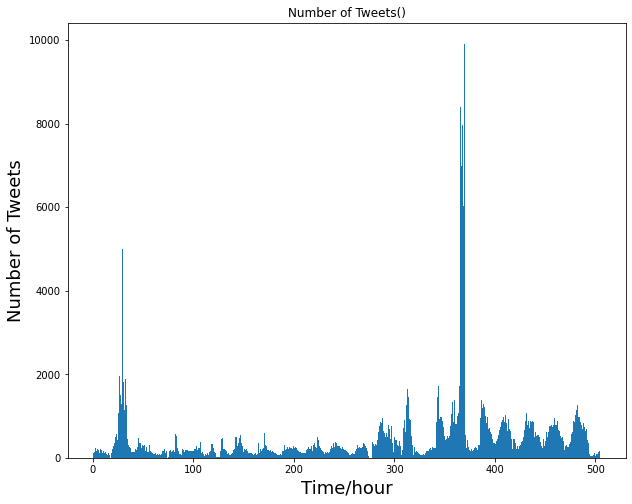

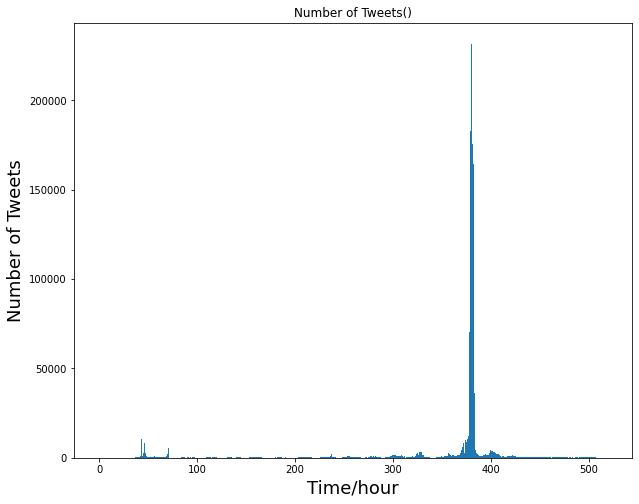

In [0]:
plothist('tweets_#nfl.txt')
plothist('tweets_#superbowl.txt')

'\nfiles = ["tweets_#gohawks.txt", \n         "tweets_#gopatriots.txt", \n         "tweets_#nfl.txt", \n         "tweets_#patriots.txt", \n         "tweets_#sb49.txt", \n         "tweets_#superbowl.txt"]\n'

In [0]:
PST_timezone = pytz.timezone('America/Los_Angeles')
superbowl = datetime.datetime.fromtimestamp(1422806400, PST_timezone)
#print(superbowl.hour)
superbowl_start = 1422777600
superbowl_end = 1422820800

In [0]:
def window(file):
    window_1 = []
    window_2 = []
    window_3 = []
    timearray = []
    with open(file, mode='r') as currentfile:
        lines = currentfile.readlines()
        for line in lines:
            json_object = json.loads(line)
            time = json_object['citation_date']
            timearray.append(time)
            if time<=superbowl_start:
                window_1.append(line)
            elif time>superbowl_end:
                window_3.append(line)
            else:
                window_2.append(line)
    
    starttime = min(timearray)
    endtime = max(timearray)
    return window_1, window_2, window_3, starttime, endtime

In [0]:
def predict(window, x, y, interval, starttime, filename, windownumber):
    prev_follower_count = 0
    current_hour=0

    for i in range(len(window)):
        json_object = json.loads(window[i])
        current_hour = int(math.floor((json_object['citation_date']-starttime)/interval))
        y[current_hour]+=1
        x[current_hour][0]+=1
        x[current_hour][1]+=json_object['metrics']['citations']['total']
        
        number_follower = json_object['author']['followers']

        x[current_hour][2]+=number_follower
        if number_follower>prev_follower_count:
            x[current_hour] = number_follower
            prev_follower_count = number_follower
        datetimeobject = datetime.datetime.fromtimestamp(json_object['citation_date'], PST_timezone)
        x[current_hour][4] = datetimeobject.hour
        
    x_train = np.delete(x, -1, 0)
    y_train = np.delete(y, 0)
    reg = LinearRegression().fit(x_train, y_train)
    y_predict = reg.predict(x_train)
    print(filename, 'window', windownumber, 'MSE = ', mean_squared_error(y_predict, y_train))
    print(filename, 'window', windownumber, 'R2 score = ', r2_score(y_predict, y_train))


In [0]:
def Piecewise_Regression(file):
    filename = file[64:-4]
    window_1 = []
    window_2 = []
    window_3 = []
    starttime, endtime = 0, 0
    window_1, window_2, window_3, starttime, endtime = window(file)
    window_1_size = len(window_1)
    window_2_size = len(window_2)
    window_3_size = len(window_3)

    x_1 = np.zeros((window_1_size, 5))
    y_1 = np.zeros(window_1_size)

    x_2 = np.zeros((window_2_size, 5))
    y_2 = np.zeros(window_2_size)

    x_3 = np.zeros((window_3_size, 5))
    y_3 = np.zeros(window_3_size)

    predict(window_1, x_1, y_1, 3600, starttime, file, 1)
    predict(window_2, x_2, y_2, 300, superbowl_start, file, 2)
    predict(window_3, x_3, y_3, 3600, superbowl_end, file, 3)


In [0]:
for i in range(len(files)):
    print(files[i], ':')
    Piecewise_Regression(files[i])
    print('\n')

C:/Users/bourn/Desktop/UCLAstudying/2020winter/ECE219/Project5/tweets_#gohawks.txt :
C:/Users/bourn/Desktop/UCLAstudying/2020winter/ECE219/Project5/tweets_#gohawks.txt window 1 MSE =  1749.7512241246761
C:/Users/bourn/Desktop/UCLAstudying/2020winter/ECE219/Project5/tweets_#gohawks.txt window 1 R2 score =  0.36638992462703057
C:/Users/bourn/Desktop/UCLAstudying/2020winter/ECE219/Project5/tweets_#gohawks.txt window 2 MSE =  16.310436890211516
C:/Users/bourn/Desktop/UCLAstudying/2020winter/ECE219/Project5/tweets_#gohawks.txt window 2 R2 score =  0.9049370158124668
C:/Users/bourn/Desktop/UCLAstudying/2020winter/ECE219/Project5/tweets_#gohawks.txt window 3 MSE =  1436.0436332460893
C:/Users/bourn/Desktop/UCLAstudying/2020winter/ECE219/Project5/tweets_#gohawks.txt window 3 R2 score =  0.7302717479776322


C:/Users/bourn/Desktop/UCLAstudying/2020winter/ECE219/Project5/tweets_#gopatriots.txt :
C:/Users/bourn/Desktop/UCLAstudying/2020winter/ECE219/Project5/tweets_#gopatriots.txt window 1 MSE = 

Q7

In [0]:
# files = ["tweets_#gohawks.txt", 
#          "tweets_#gopatriots.txt", 
#          "tweets_#nfl.txt", 
#          "tweets_#patriots.txt", 
#          "tweets_#sb49.txt", 
#          "tweets_#superbowl.txt"]

def getcsv2(file):
    timestamp = []
    tweet_count = []
    followers_count = []
    retweet_count = []
    url_count=[]
    user_mentions=[]
    favorited_num=[]
    ranking_score=[]
    hashtag_number=[]
    with open(file, 'r') as fl:
        for line in fl:
            data = json.loads(line)
            timestamp.append(data['citation_date'])
            tweet_count.append(1)
            followers_count.append(data['author']['followers'])
            retweet_count.append(data['metrics']['citations']['total'])
            url_count.append(len(data['tweet']['entities']['urls']))
            user_mentions.append(len(data['tweet']['entities']['user_mentions']))
            favorited_num.append(data['tweet']['favorite_count'])
            ranking_score.append(data['metrics']['ranking_score'])
            hashtag_number.append(data['title'].count('#'))
        df = pd.DataFrame({
            'tweet' : tweet_count,
            'timestamp' : timestamp,
            'followers' : followers_count,
            'retweeted times' : retweet_count,
            'url count':url_count,
            'user mention':user_mentions,
            'favorited num':favorited_num,
            'ranking score': ranking_score,
            'hashtag count':hashtag_number
            }, columns = ['tweet', 'timestamp', 'followers', 
                   'retweeted times','url count',
                   'user mention','favorited num',
                   'ranking score','hashtag count'])
        
        df.to_csv('part1_7'+file[71:-4]+'.csv', index = False)


In [0]:
print(len('C:/Users/bourn/Desktop/UCLAstudying/2020winter/ECE219/Project5/tweets_#'))

71


In [0]:
for file in files:
    getcsv2(file)
print('done')

done


In [0]:
newfiles2 = ['part1_7gohawks.csv', 
         'part1_7gopatriots.csv', 
         'part1_7nfl.csv', 
         'part1_7patriots.csv', 
         'part1_7sb49.csv', 
         'part1_7superbowl.csv']

Aggregate data

In [0]:
def aggregate_data(files):
    All_window_1 = []
    All_window_2 = []
    All_window_3 = []


    for file in files:
        data = pd.read_csv(file, dtype = 'float32')
        row_number = data['tweet'].count()
        data.columns = ['tweet', 'timestamp', 'followers', 
                        'retweets','url count','user mention',
                        'favorited num','ranking score','hashtag count']
        data=data.drop(['url count','user mention','favorited num',
                        'ranking score','hashtag count'],axis=1)
        
        All_window_1=data.query('timestamp<=1422777600')
        All_window_2=data.query('timestamp<=1422820800 and timestamp>1422777600')
        All_window_3=data.query('timestamp>1422820800')
    Allstarttime = data['timestamp'].max()
    Allendtime = data['timestamp'].min()
    return All_window_1, All_window_2, All_window_3, Allstarttime, Allendtime

In [0]:
All_window_1, All_window_2, All_window_3, Allstarttime, Allendtime = aggregate_data(newfiles2)

In [0]:
def predict_piecewise_all(window,x,y,interval,starttime,filename,windownumber):
    prev_follwer_count=0
    currenthour=0
    for i in range(window['tweet'].count()) :
        time=window.iloc[i]['timestamp']
        currenthour = int(math.floor((time-starttime)/interval))
        y[currenthour]+=1        
        x[currenthour][0]+=1
        x[currenthour][1]+=window.iloc[i]['retweets'] 
        number_follower=window.iloc[i]['followers']
        x[currenthour][2]+=number_follower 
        if number_follower>prev_follwer_count: 
            x[currenthour][3]=number_follower
            prev_follower_count=number_follower
        datetimeobject=datetime.datetime.fromtimestamp(time,PST_timezone)
        x[currenthour][4]=datetimeobject.hour
        
   
    x_train=np.delete(x,-1,0)
    y_train=np.delete(y,0)
    reg = LinearRegression().fit(x_train, y_train)
    y_predicted =reg.predict(x_train)
    print(filename,'window',windownumber,'MSE =:',mean_squared_error(y_predicted,y_train))
    print(filename,'window',windownumber,'R2_score =:',r2_score(y_predicted,y_train))
    return x_train, y_train

In [0]:
window1size=All_window_1['tweet'].count()
y_1=np.zeros(window1size)
x_1=np.zeros((window1size,5))
predict_piecewise_all(All_window_1,x_1,y_1,3600,Allstarttime,'Alldata',1)

Alldata window 1 MSE =: 1191.2195695237467
Alldata window 1 R2_score =: -0.28565661443676094


(array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]), array([0., 0., 0., ..., 0., 0., 0.]))

In [0]:
window2size=All_window_2['tweet'].count()
y_2=np.zeros(window2size)
x_2=np.zeros((window2size,5))
predict_piecewise_all(All_window_2,x_2,y_2,300,Allstarttime,'Alldata',2)

Alldata window 2 MSE =: 87.39908530048552
Alldata window 2 R2_score =: 0.8413176706991644


(array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]), array([0., 0., 0., ..., 0., 0., 0.]))

In [0]:
window3size=All_window_3['tweet'].count()
y_3=np.zeros(window3size)
x_3=np.zeros((window3size,5))
predict_piecewise_all(All_window_3,x_3,y_3,3600,Allstarttime,'Alldata',3)

Alldata window 3 MSE =: 31465.931673357518
Alldata window 3 R2_score =: 0.7504146144787548


(array([[1.000e+00, 4.000e+00, 4.333e+04, 4.333e+04, 9.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        ...,
        [2.000e+00, 3.000e+00, 3.454e+03, 2.085e+03, 6.000e+00],
        [3.000e+00, 3.000e+00, 1.863e+03, 5.200e+01, 7.000e+00],
        [2.000e+00, 2.000e+00, 1.621e+03, 1.070e+02, 8.000e+00]]),
 array([0., 0., 0., ..., 3., 2., 4.]))

# Nonlinear Regression

## Q8

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [0]:
parameters = {
'max_depth': [10, 30, 50, 70, 100, 200, None], 
 'max_features': ['auto', 'sqrt'], 
 'min_samples_leaf': [1, 2,3, 4], 
 'min_samples_split': [2, 5, 10], 
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

In [0]:
aggregate_window = All_window_1.append(All_window_2)
aggregate_window = aggregate_window.append(All_window_3)
agg_starttime = aggregate_window['timestamp'].max()
agg_endtime = aggregate_window['timestamp'].min()

In [0]:
def feature_construct_CV(window):    
    windowsize=window['tweet'].count()
    ytrain=np.zeros(windowsize)
    xtrain=np.zeros((windowsize,5))
    prev_follwer_count=0
    current_hour=0
    for i in range(window['tweet'].count()) :
        time=window.iloc[i]['timestamp']
        current_hour = int(math.floor((time-agg_starttime)/3600))
        ytrain[current_hour]+=1        
        xtrain[current_hour][0]+=1
        xtrain[current_hour][1]+=window.iloc[i]['retweets']
        number_follower=window.iloc[i]['followers']
        xtrain[current_hour][2]+=number_follower
        if number_follower>prev_follwer_count:
            xtrain[current_hour][3]=number_follower
            prev_follower_count=number_follower
        datetimeobject=datetime.datetime.fromtimestamp(time,PST_timezone)
        xtrain[current_hour][4]=datetimeobject.hour

    x_train=np.delete(xtrain,-1,0)
    y_train=np.delete(ytrain,0)
    return x_train, y_train


In [0]:
x_train_aggCV, y_train_aggCV = feature_construct_CV(aggregate_window)

# Do not run the code below until Q11 !!!

In [0]:
from sklear.model_selection import KFold

In [0]:
reg_RFR=GridSearchCV(RandomForestRegressor(),parameters,cv = 5, scoring='neg_mean_squared_error',verbose=10, n_jobs = -1)
reg_RFR.fit(x_train_aggCV, y_train_aggCV)

In [0]:
print(reg_RFR.best_estimator_)
print(reg_RFR.best_score_)

In [0]:
from sklearn.model_selection import KFold
reg_GBR=GridSearchCV(GradientBoostingRegressor(),parameters,cv = 5, scoring='neg_mean_squared_error',verbose=10, n_jobs = -1)
reg_GBR.fit(x_train_aggCV, y_train_aggCV)

In [0]:
print(reg_GBR.best_estimator_)
print(reg_GBR.best_score_)

# Q11

In [0]:
from sklearn.neural_network import MLPRegressor

In [0]:
hidden_layer_size = [50,100,200]
#hidden layer number = 1, 2, 3, 4

In [0]:
for num in hidden_layer_size:  
    y_predicted = 0
    Model_MLP_1=MLPRegressor(hidden_layer_sizes=(num,),
                 activation='relu',
                 solver='adam',
                 learning_rate='adaptive',
                 max_iter=200,
                 learning_rate_init=0.01,
                 alpha=0.01,
                 verbose=10,       
                       )
    Model_MLP_1.fit(x_train_aggCV,y_train_aggCV)
    y_predicted =Model_MLP_1.predict(x_train_aggCV)
    print('The hidden layer size =', num)
    print('MSE for model layer number is 1 =:',mean_squared_error(y_predicted,y_train_aggCV))
    print('\n')

Iteration 1, loss = 69694702905.40484619
Iteration 2, loss = 14721460953.84986877
Iteration 3, loss = 30732695.81883148
Iteration 4, loss = 64442.85098530
Iteration 5, loss = 64441.87306902
Iteration 6, loss = 64441.52712627
Iteration 7, loss = 64441.48185595
Iteration 8, loss = 66123.01284814
Iteration 9, loss = 74997.94327687
Iteration 10, loss = 1836650.56334538
Iteration 11, loss = 10367922.17686158
Iteration 12, loss = 1557881179.22054148
Iteration 13, loss = 13138523.06737888
Iteration 14, loss = 769186.97908872
Iteration 15, loss = 64442.17684049
Iteration 16, loss = 71732.06458084
Iteration 17, loss = 1303066.27484273
Iteration 18, loss = 599915.80922967
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
The hidden layer size = 50
MSE for model layer number is 1 =: 128877.81326886978


Iteration 1, loss = 14279256.41296867
Iteration 2, loss = 64456.17338231
Iteration 3, loss = 64444.86884199
Iteration 4, loss = 64438.54071939
Iteration 5, 

In [0]:
for num in hidden_layer_size:  
    y_predited_2 = 0
    Model_MLP_2=MLPRegressor(hidden_layer_sizes=(num,num),
                 activation='relu',
                 solver='adam',
                 learning_rate='adaptive',
                 max_iter=200,
                 learning_rate_init=0.01,
                 alpha=0.01,
                 verbose=10,       
                       )
    Model_MLP_2.fit(x_train_aggCV,y_train_aggCV)
    y_predicted_2 =Model_MLP_2.predict(x_train_aggCV)
    print('The hidden layer size =', num)
    print('MSE for model layer number is 2 =:',mean_squared_error(y_predicted_2,y_train_aggCV))
    print('\n')

Iteration 1, loss = 148390113.80190828
Iteration 2, loss = 64430.41785485
Iteration 3, loss = 64376.13621936
Iteration 4, loss = 64290.69136672
Iteration 5, loss = 64150.08170834
Iteration 6, loss = 67042.90910366
Iteration 7, loss = 235493.06535763
Iteration 8, loss = 2197152.90702764
Iteration 9, loss = 584653610.40824902
Iteration 10, loss = 197497780.45864880
Iteration 11, loss = 64415.58634969
Iteration 12, loss = 286206020.61954409
Iteration 13, loss = 116691.11971779
Iteration 14, loss = 562165488.37635970
Iteration 15, loss = 1490859177.41633773
Iteration 16, loss = 21202532.75647885
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
The hidden layer size = 50
MSE for model layer number is 2 =: 128150.9272828794


Iteration 1, loss = 47721261725.06785583
Iteration 2, loss = 81397.59169997
Iteration 3, loss = 64427.89529943
Iteration 4, loss = 64421.69637645
Iteration 5, loss = 9243114.71166022
Iteration 6, loss = 64272.91224970
Iteration 7

In [0]:
for num in hidden_layer_size:  
    y_predicted_3 = 0
    Model_MLP_3=MLPRegressor(hidden_layer_sizes=(num,num,num),
                 activation='relu',
                 solver='adam',
                 learning_rate='adaptive',
                 max_iter=200,
                 learning_rate_init=0.01,
                 alpha=0.01,
                 verbose=10,       
                       )
    Model_MLP_3.fit(x_train_aggCV,y_train_aggCV)
    y_predicted_3 =Model_MLP_3.predict(x_train_aggCV)
    print('The hidden layer size =', num)
    print('MSE for model layer number is 3 =:',mean_squared_error(y_predicted_3,y_train_aggCV))
    print('\n')

Iteration 1, loss = 1315987.48392960
Iteration 2, loss = 64411.92294085
Iteration 3, loss = 64382.44237535
Iteration 4, loss = 64309.84214528
Iteration 5, loss = 1110722012.37003899
Iteration 6, loss = 63794.28497742
Iteration 7, loss = 202852.29000278
Iteration 8, loss = 7816910.74637653
Iteration 9, loss = 144125415.46606657
Iteration 10, loss = 217312709.44994059
Iteration 11, loss = 411033124.12269855
Iteration 12, loss = 64442671.31264365
Iteration 13, loss = 5193085253.06907749
Iteration 14, loss = 2591138744.17792082
Iteration 15, loss = 307796.60825922
Iteration 16, loss = 58578977.11743305
Iteration 17, loss = 99722401.61526838
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
The hidden layer size = 50
MSE for model layer number is 3 =: 128454.21552308132


Iteration 1, loss = 512882925.82346648
Iteration 2, loss = 69633.29688800
Iteration 3, loss = 63769.65821332
Iteration 4, loss = 63611.27319224
Iteration 5, loss = 63693.55022731
Ite

In [0]:
for num in hidden_layer_size:  
    y_predicted_4 = 0
    Model_MLP_4=MLPRegressor(hidden_layer_sizes=(num,num,num,num),
                 activation='relu',
                 solver='adam',
                 learning_rate='adaptive',
                 max_iter=200,
                 learning_rate_init=0.01,
                 alpha=0.01,
                 verbose=10,       
                       )
    Model_MLP_4.fit(x_train_aggCV,y_train_aggCV)
    y_predicted_4 =Model_MLP_4.predict(x_train_aggCV)
    print('The hidden layer size =', num)
    print('MSE for model layer number is 4 =:',mean_squared_error(y_predicted_4,y_train_aggCV))
    print('\n')

Iteration 1, loss = 273171.76146675
Iteration 2, loss = 63805.64999752
Iteration 3, loss = 63758.21954977
Iteration 4, loss = 3089557.97073618
Iteration 5, loss = 63947.46604293
Iteration 6, loss = 63836.30603124
Iteration 7, loss = 74063812.57735807
Iteration 8, loss = 28873396.19298202
Iteration 9, loss = 11215569438.94309044
Iteration 10, loss = 352077509.87555850
Iteration 11, loss = 5022632476.25821209
Iteration 12, loss = 3407146241.04759026
Iteration 13, loss = 50661004.45645434
Iteration 14, loss = 1032560156.92624807
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
The hidden layer size = 50
MSE for model layer number is 4 =: 128333.90922977257


Iteration 1, loss = 131364.04433669
Iteration 2, loss = 163800.19799230
Iteration 3, loss = 2808907684.06398296
Iteration 4, loss = 877686240.30839396
Iteration 5, loss = 396127662.39593297
Iteration 6, loss = 160937558.24253583
Iteration 7, loss = 21547215407.67320633
Iteration 8, loss = 86819

# Q12

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train_aggCV)
y_train_scaler = scaler.fit_transform(y_train_aggCV[:, None])[:, 0]
Model_after_scaler = MLPRegressor(hidden_layer_sizes=(100,100),
                 activation='relu',
                 solver='adam',
                 learning_rate='adaptive',
                 max_iter=200,
                 learning_rate_init=0.01,
                 alpha=0.01,
                 verbose=10,       
                       )
Model_after_scaler.fit(x_train_scaler, y_train_scaler)
y_predicted_scaler = Model_after_scaler.predict(x_train_scaler)
print('After Scaler, MSE =', mean_squared_error(y_predicted_scaler, y_train_scaler))

Iteration 1, loss = 0.22715370
Iteration 2, loss = 1.44320857
Iteration 3, loss = 1.75471832
Iteration 4, loss = 0.50341038
Iteration 5, loss = 2.09076930
Iteration 6, loss = 0.56518524
Iteration 7, loss = 0.43271458
Iteration 8, loss = 0.39448788
Iteration 9, loss = 0.55648430
Iteration 10, loss = 0.86305777
Iteration 11, loss = 0.44798262
Iteration 12, loss = 0.45107659
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
After Scaler, MSE = 0.4647630696194375


# Q13

In [0]:
def predict_NN_scaler_CV(window, x, y, interval, starttime, filename, windownumber, model, parameters):
    prev_follwer_count=0
    currenthour=0
    for i in range(window['tweet'].count()) :
        time=window.iloc[i]['timestamp']
        currenthour = int(math.floor((time-starttime)/interval))
        y[currenthour]+=1        
        x[currenthour][0]+=1
        x[currenthour][1]+=window.iloc[i]['retweets'] #retweet count
        number_follower=window.iloc[i]['followers']
        x[currenthour][2]+=number_follower #total followers
        if number_follower>prev_follwer_count:#keep maximum follower 
            x[currenthour][3]=number_follower
            prev_follower_count=number_follower
        datetimeobject=datetime.datetime.fromtimestamp(time,PST_timezone)
        x[currenthour][4]=datetimeobject.hour
        
    x_train=np.delete(x,-1,0)
    x_train=scaler.fit_transform(x_train)
    y_train=np.delete(y,0)
    y_train=scaler.fit_transform(y_train[:, None])[:, 0]
    reg=GridSearchCV(model,parameters,cv = KFold(5, shuffle = True), scoring='neg_mean_squared_error',verbose=10,n_jobs=-1)
    reg.fit(x_train,y_train)
    return reg

In [0]:
parameter_NN = {
    'hidden_layer_sizes':[(100,),(100,100),(100,100,100),
                          (200,),(200,200),(200,200,200),
                          (300,),(300,300),(300,300,300)],
             'learning_rate':['adaptive'],
             'max_iter':[200],
             'learning_rate_init':[0.01],
             'alpha':[0.0001],
             'verbose':[10]
    
}

In [0]:
window_NNCV_size_1 = All_window_1['tweet'].count()
y_1 = np.zeros(window_NNCV_size_1)
x_1 = np.zeros((window_NNCV_size_1,5))
reg_NNCV_1 = predict_NN_scaler_CV(All_window_1, x_1, y_1, 3600, Allstarttime, 'Alldata', 1, MLPRegressor(), parameter_NN)
print('window_1 NN for Nerual Network', reg_NNCV_1.best_score_)
print('window_1 Best Parameters:', reg_NNCV_1.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  27 out of  45 | elapsed:  5.7min remaining:  3.8min
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:  7.5min remaining:  3.0min
[Parallel(n_jobs=-1)]: Done  37 out of  45 | elapsed: 12.6min remaining:  2.7min
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed: 19.3min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 29.3min finished


Iteration 1, loss = 0.43055807
Iteration 2, loss = 0.41504574
Iteration 3, loss = 0.33650030
Iteration 4, loss = 0.43548718
Iteration 5, loss = 0.35060599
Iteration 6, loss = 0.31892533
Iteration 7, loss = 0.30603277
Iteration 8, loss = 0.28905894
Iteration 9, loss = 0.29232232
Iteration 10, loss = 0.28804317
Iteration 11, loss = 0.26684317
Iteration 12, loss = 0.32108148
Iteration 13, loss = 0.27968774
Iteration 14, loss = 0.29425377
Iteration 15, loss = 0.29117379
Iteration 16, loss = 0.28115720
Iteration 17, loss = 0.27060980
Iteration 18, loss = 0.28302816
Iteration 19, loss = 0.27819285
Iteration 20, loss = 0.30064268
Iteration 21, loss = 0.27381021
Iteration 22, loss = 0.30334424
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
window_1 NN for Nerual Network -0.6533317485318457
window_1 Best Parameters: {'alpha': 0.0001, 'hidden_layer_sizes': (300,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'max_iter': 200, 'verbose': 10}


In [0]:
window_NNCV_size_2 = All_window_2['tweet'].count()
y_2 = np.zeros(window_NNCV_size_2)
x_2 = np.zeros((window_NNCV_size_2,5))
reg_NNCV_2 = predict_NN_scaler_CV(All_window_2, x_2, y_2, 300, Allstarttime, 'Alldata', 2, MLPRegressor(), parameter_NN)
print('window_2 NN for Nerual Network', reg_NNCV_2.best_score_)
print('window_2 Best Parameters:', reg_NNCV_2.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  27 out of  45 | elapsed:  2.5min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed:  3.6min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  37 out of  45 | elapsed:  4.9min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed:  6.3min remaining:   26.7s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  7.7min finished


Iteration 1, loss = 0.38036762
Iteration 2, loss = 0.13573556
Iteration 3, loss = 0.14398103
Iteration 4, loss = 0.13852023
Iteration 5, loss = 0.16989223
Iteration 6, loss = 0.09593654
Iteration 7, loss = 0.10519040
Iteration 8, loss = 0.10338783
Iteration 9, loss = 0.09429696
Iteration 10, loss = 0.10164466
Iteration 11, loss = 0.10757337
Iteration 12, loss = 0.08955322
Iteration 13, loss = 0.09019240
Iteration 14, loss = 0.08948822
Iteration 15, loss = 0.08887757
Iteration 16, loss = 0.09338095
Iteration 17, loss = 0.09333052
Iteration 18, loss = 0.08203071
Iteration 19, loss = 0.08229534
Iteration 20, loss = 0.08887138
Iteration 21, loss = 0.11196084
Iteration 22, loss = 0.09374904
Iteration 23, loss = 0.08426504
Iteration 24, loss = 0.08311743
Iteration 25, loss = 0.07863767
Iteration 26, loss = 0.08409952
Iteration 27, loss = 0.08836734
Iteration 28, loss = 0.08495686
Iteration 29, loss = 0.07547410
Iteration 30, loss = 0.08251613
Iteration 31, loss = 0.08142416
Iteration 32, los

In [0]:
window_NNCV_size_3 = All_window_3['tweet'].count()
y_3 = np.zeros(window_NNCV_size_3)
x_3 = np.zeros((window_NNCV_size_3,5))
reg_NNCV_3 = predict_NN_scaler_CV(All_window_3, x_3, y_3, 3600, Allstarttime, 'Alldata', 3, MLPRegressor(), parameter_NN)
print('window_3 NN for Nerual Network', reg_NNCV_3.best_score_)
print('window_3 Best Parameters:', reg_NNCV_3.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done  27 out of  45 | elapsed: 42.8min remaining: 28.5min
[Parallel(n_jobs=-1)]: Done  32 out of  45 | elapsed: 58.3min remaining: 23.7min
[Parallel(n_jobs=-1)]: Done  37 out of  45 | elapsed: 83.9min remaining: 18.1min
[Parallel(n_jobs=-1)]: Done  42 out of  45 | elapsed: 106.6min remaining:  7.6min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 154.3min finished


Iteration 1, loss = 7.48444842
Iteration 2, loss = 3.32641561
Iteration 3, loss = 1.05534785
Iteration 4, loss = 1.70098648
Iteration 5, loss = 1.75448319
Iteration 6, loss = 0.49407073
Iteration 7, loss = 0.74134363
Iteration 8, loss = 0.29304253
Iteration 9, loss = 0.43288058
Iteration 10, loss = 0.18282031
Iteration 11, loss = 0.26500189
Iteration 12, loss = 0.37423852
Iteration 13, loss = 0.70380064
Iteration 14, loss = 0.16313963
Iteration 15, loss = 0.35688440
Iteration 16, loss = 0.39545987
Iteration 17, loss = 0.21090490
Iteration 18, loss = 0.21239963
Iteration 19, loss = 0.38374999
Iteration 20, loss = 0.28220547
Iteration 21, loss = 0.11343216
Iteration 22, loss = 0.28660097
Iteration 23, loss = 0.30714098
Iteration 24, loss = 0.40075784
Iteration 25, loss = 0.23815566
Iteration 26, loss = 0.11943414
Iteration 27, loss = 0.32141355
Iteration 28, loss = 0.49870179
Iteration 29, loss = 0.20189714
Iteration 30, loss = 0.31643499
Iteration 31, loss = 0.25663270
Iteration 32, los